🤖 Wuthering Waves Sentiment Analysis - Model Training
🎯 Supervised Learning Multi-Platform Sentiment Classification
📊 Target: Build production-ready sentiment analysis model

📁 LOADING PROCESSED DATA
✅ Loaded ML dataset: ../data/processed\ml_ready_dataset_20250529_003526.csv
📊 Dataset shape: (5000, 10)
📋 Features: ['review_id', 'source', 'clean_text', 'sentiment', 'rating', 'text_length', 'word_count', 'exclamation_count', 'question_count', 'capital_ratio']

📈 Dataset Overview:
Total samples: 5000
Sentiment distribution:
  Positive: 3407 (68.1%)
  Negative: 1277 (25.5%)
  Neutral: 316 (6.3%)

🔧 TEXT PREPROCESSING SETUP
Original: This game is AMAZING!!! 🎮 I love it so much! https://example.com Best game ever!
Processed: this game is amazing!!! love it so much! best game ever!

🧹 Applying text preprocessing...
✅ Preprocessing complete. Remaining samples: 4999

🎯 PREPARING FEATURES & LABELS
Feature matrix shape: (4999,)
Label vector shape: (4999,)

📊 Final label distribution:
  positive: 

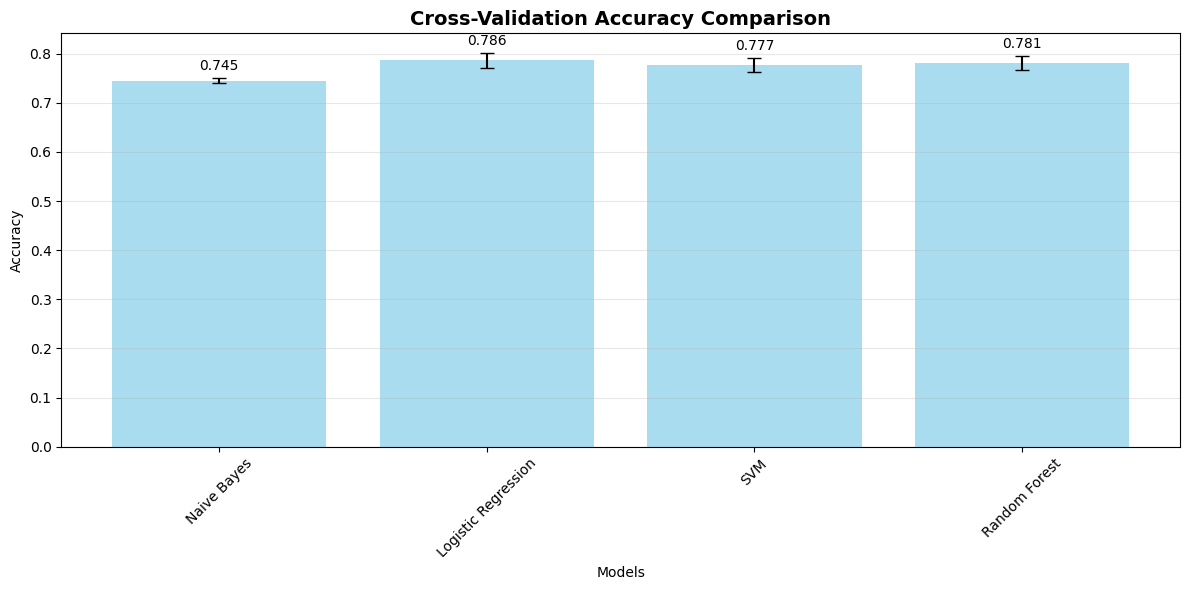


🎯 MODEL EVALUATION ON TEST SET

📊 Evaluating Naive Bayes on test set...
  🎯 Test Accuracy: 0.7600
  📋 Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.33      0.48       256
     neutral       0.00      0.00      0.00        63
    positive       0.75      0.99      0.85       681

    accuracy                           0.76      1000
   macro avg       0.54      0.44      0.44      1000
weighted avg       0.73      0.76      0.70      1000


📊 Evaluating Logistic Regression on test set...
  🎯 Test Accuracy: 0.7790
  📋 Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.52      0.61       256
     neutral       0.00      0.00      0.00        63
    positive       0.79      0.95      0.86       681

    accuracy                           0.78      1000
   macro avg       0.51      0.49      0.49      1000
weighted avg       0.73      0.78      0.74      1000


📊 Evaluat

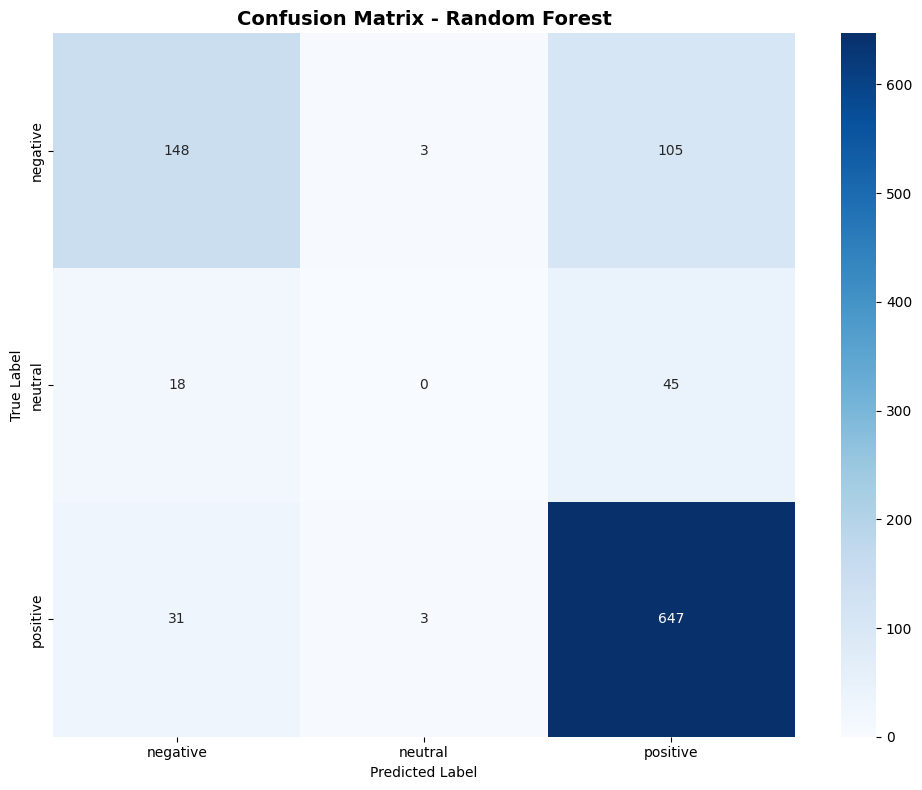


🔍 Feature Importance Analysis:
Top 20 Most Important Features:
  anniversary: 0.0367
  game: 0.0140
  bad: 0.0138
  best: 0.0098
  love: 0.0098
  rewards: 0.0090
  anniversary rewards: 0.0077
  good: 0.0068
  worst: 0.0063
  greedy: 0.0060
  trash: 0.0060
  predatory: 0.0059
  money: 0.0046
  terrible: 0.0045
  worse: 0.0040
  patch: 0.0040
  banners: 0.0040
  disappointing: 0.0038
  update: 0.0038
  laggy: 0.0038

⚡ HYPERPARAMETER TUNING FOR Random Forest
🔍 Performing grid search for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
✅ Grid search completed!
🏆 Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
🎯 Best cross-validation score: 0.7812
🎯 Tuned model test accuracy: 0.7880
📊 Original model is still better: 0.7950

💾 SAVING BEST MODEL
✅ Best model saved to: ../models/best_sentiment_model.pkl
✅ Model metadata saved to: ../models/model_metadata.pkl

🧪 TESTING MODEL WITH SAMPLE PREDIC

In [1]:
# Wuthering Waves Sentiment Analysis - Model Training & Development
# ================================================================
# Supervised Learning untuk Multi-Platform Sentiment Analysis

# Cell 1: Import Libraries & Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import pickle
import joblib
import re
import warnings
warnings.filterwarnings('ignore')

# Text preprocessing
import string
from collections import Counter

# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("🤖 Wuthering Waves Sentiment Analysis - Model Training")
print("=" * 60)
print("🎯 Supervised Learning Multi-Platform Sentiment Classification")
print("📊 Target: Build production-ready sentiment analysis model")

# Cell 2: Load & Prepare Data
print("\n📁 LOADING PROCESSED DATA")
print("=" * 40)

# Load the ML-ready dataset
data_path = '../data/processed/'
import glob
import os

# Find latest ML-ready dataset
ml_files = glob.glob(f"{data_path}ml_ready_dataset_*.csv")
if ml_files:
    latest_file = max(ml_files, key=os.path.getctime)
    df = pd.read_csv(latest_file)
    print(f"✅ Loaded ML dataset: {latest_file}")
else:
    # Fallback to combined dataset
    combined_files = glob.glob(f"{data_path}wuthering_waves_combined_*.csv")
    if combined_files:
        latest_file = max(combined_files, key=os.path.getctime)
        df = pd.read_csv(latest_file)
        print(f"⚠️ Using combined dataset: {latest_file}")
    else:
        print("❌ No processed data found!")
        exit()

print(f"📊 Dataset shape: {df.shape}")
print(f"📋 Features: {list(df.columns)}")

# Basic info about the dataset
print(f"\n📈 Dataset Overview:")
print(f"Total samples: {len(df)}")
print(f"Sentiment distribution:")
sentiment_counts = df['sentiment'].value_counts()
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {sentiment.capitalize()}: {count} ({percentage:.1f}%)")

# Cell 3: Text Preprocessing Function
print("\n🔧 TEXT PREPROCESSING SETUP")
print("=" * 40)

def advanced_text_preprocessing(text):
    """
    Advanced text preprocessing for sentiment analysis
    """
    if pd.isna(text) or text == '':
        return ''
    
    # Convert to string and lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers (optional - keep for sentiment context)
    # text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Remove punctuation but keep some sentiment indicators
    # Keep: ! ? . , - 
    text = re.sub(r'[^\w\s\!\?\.\,\-]', ' ', text)
    
    # Remove short words (less than 2 characters)
    words = text.split()
    words = [word for word in words if len(word) > 1]
    
    return ' '.join(words)

# Test preprocessing function
sample_text = "This game is AMAZING!!! 🎮 I love it so much! https://example.com Best game ever!"
print(f"Original: {sample_text}")
print(f"Processed: {advanced_text_preprocessing(sample_text)}")

# Apply preprocessing to the dataset
print(f"\n🧹 Applying text preprocessing...")
df['processed_text'] = df['clean_text'].apply(advanced_text_preprocessing)

# Remove empty texts after preprocessing
df = df[df['processed_text'].str.len() > 0]
print(f"✅ Preprocessing complete. Remaining samples: {len(df)}")

# Cell 4: Prepare Features and Labels
print("\n🎯 PREPARING FEATURES & LABELS")
print("=" * 40)

# Features (X) and Labels (y)
X = df['processed_text']
y = df['sentiment']

print(f"Feature matrix shape: {X.shape}")
print(f"Label vector shape: {y.shape}")

# Check label distribution
print(f"\n📊 Final label distribution:")
label_dist = y.value_counts()
for label, count in label_dist.items():
    percentage = (count / len(y)) * 100
    print(f"  {label}: {count} ({percentage:.1f}%)")

# Encode labels for sklearn (optional - many algorithms can handle string labels)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\n🔤 Label encoding:")
for i, label in enumerate(label_encoder.classes_):
    print(f"  {label} → {i}")

# Cell 5: Train-Test Split
print("\n✂️ TRAIN-TEST SPLIT")
print("=" * 40)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

# Check distribution in splits
print(f"\n📊 Training set distribution:")
train_dist = y_train.value_counts()
for label, count in train_dist.items():
    percentage = (count / len(y_train)) * 100
    print(f"  {label}: {count} ({percentage:.1f}%)")

print(f"\n📊 Testing set distribution:")
test_dist = y_test.value_counts()
for label, count in test_dist.items():
    percentage = (count / len(y_test)) * 100
    print(f"  {label}: {count} ({percentage:.1f}%)")

# Cell 6: Feature Extraction Setup
print("\n🔤 FEATURE EXTRACTION SETUP")
print("=" * 40)

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,          # Top 10k most frequent words
    min_df=2,                    # Word must appear in at least 2 documents
    max_df=0.95,                 # Ignore words in more than 95% of documents
    ngram_range=(1, 2),          # Use unigrams and bigrams
    stop_words='english',        # Remove English stop words
    lowercase=True,              # Convert to lowercase
    strip_accents='ascii'        # Remove accents
)

# Count Vectorizer (alternative)
count_vectorizer = CountVectorizer(
    max_features=10000,
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 2),
    stop_words='english',
    lowercase=True,
    strip_accents='ascii'
)

# Transform the training data to see feature extraction results
print("🔍 Testing TF-IDF vectorization...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
print(f"TF-IDF feature matrix shape: {X_train_tfidf.shape}")
print(f"Feature density: {X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]):.4f}")

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"Sample features: {feature_names[:20]}")

# Cell 7: Model Selection & Pipeline Setup
print("\n🤖 MODEL SELECTION & PIPELINE SETUP")
print("=" * 50)

# Define models to compare
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'SVM': SVC(random_state=RANDOM_STATE, probability=True),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100)
}

# Create pipelines
pipelines = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95, 
                                 ngram_range=(1, 2), stop_words='english')),
        ('classifier', model)
    ])
    pipelines[name] = pipeline
    print(f"✅ Created pipeline for {name}")

print(f"\n🎯 Ready to train {len(pipelines)} models:")
for name in pipelines.keys():
    print(f"  • {name}")

# Cell 8: Model Training & Cross-Validation
print("\n🏋️ MODEL TRAINING & CROSS-VALIDATION")
print("=" * 50)

# Store results
cv_results = {}
trained_models = {}

# Train and evaluate each model
for name, pipeline in pipelines.items():
    print(f"\n🔄 Training {name}...")
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'cv_scores': cv_scores
    }
    
    # Train on full training set
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline
    
    print(f"  ✅ {name} trained successfully")
    print(f"  📊 Cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Display cross-validation results
print(f"\n📊 CROSS-VALIDATION RESULTS SUMMARY")
print("=" * 50)
cv_df = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'CV_Mean': [results['cv_mean'] for results in cv_results.values()],
    'CV_Std': [results['cv_std'] for results in cv_results.values()]
})
cv_df = cv_df.sort_values('CV_Mean', ascending=False)
print(cv_df)

# Visualize cross-validation results
plt.figure(figsize=(12, 6))
models_names = list(cv_results.keys())
cv_means = [cv_results[name]['cv_mean'] for name in models_names]
cv_stds = [cv_results[name]['cv_std'] for name in models_names]

plt.bar(models_names, cv_means, yerr=cv_stds, capsize=5, alpha=0.7, color='skyblue')
plt.title('Cross-Validation Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, (mean, std) in enumerate(zip(cv_means, cv_stds)):
    plt.text(i, mean + std + 0.01, f'{mean:.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Cell 9: Model Evaluation on Test Set
print("\n🎯 MODEL EVALUATION ON TEST SET")
print("=" * 50)

test_results = {}

for name, model in trained_models.items():
    print(f"\n📊 Evaluating {name} on test set...")
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    test_results[name] = {
        'accuracy': accuracy,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"  🎯 Test Accuracy: {accuracy:.4f}")
    
    # Classification report
    print(f"  📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=model.classes_))

# Summary of test results
print(f"\n📊 TEST RESULTS SUMMARY")
print("=" * 30)
test_df = pd.DataFrame({
    'Model': list(test_results.keys()),
    'Test_Accuracy': [results['accuracy'] for results in test_results.values()],
    'CV_Mean': [cv_results[name]['cv_mean'] for name in test_results.keys()]
})
test_df = test_df.sort_values('Test_Accuracy', ascending=False)
print(test_df)

# Find best model
best_model_name = test_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_accuracy = test_df.iloc[0]['Test_Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"🎯 Best Test Accuracy: {best_accuracy:.4f}")

# Cell 10: Detailed Analysis of Best Model
print(f"\n🔍 DETAILED ANALYSIS OF BEST MODEL: {best_model_name}")
print("=" * 60)

# Get predictions for best model
best_predictions = test_results[best_model_name]['predictions']

# Confusion Matrix
print("📊 Confusion Matrix:")
cm = confusion_matrix(y_test, best_predictions)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature importance (for models that support it)
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    print(f"\n🔍 Feature Importance Analysis:")
    feature_names = best_model.named_steps['tfidf'].get_feature_names_out()
    feature_importance = best_model.named_steps['classifier'].feature_importances_
    
    # Get top 20 most important features
    top_features_idx = np.argsort(feature_importance)[-20:]
    top_features = [(feature_names[i], feature_importance[i]) for i in top_features_idx]
    top_features.reverse()
    
    print("Top 20 Most Important Features:")
    for feature, importance in top_features:
        print(f"  {feature}: {importance:.4f}")

elif hasattr(best_model.named_steps['classifier'], 'coef_'):
    print(f"\n🔍 Feature Coefficient Analysis:")
    feature_names = best_model.named_steps['tfidf'].get_feature_names_out()
    
    # For multi-class classification, get coefficients for each class
    if len(best_model.classes_) > 2:
        for i, class_name in enumerate(best_model.classes_):
            coef = best_model.named_steps['classifier'].coef_[i]
            top_positive_idx = np.argsort(coef)[-10:]
            top_negative_idx = np.argsort(coef)[:10]
            
            print(f"\nClass: {class_name}")
            print("Top positive features:")
            for idx in reversed(top_positive_idx):
                print(f"  {feature_names[idx]}: {coef[idx]:.4f}")
            print("Top negative features:")
            for idx in top_negative_idx:
                print(f"  {feature_names[idx]}: {coef[idx]:.4f}")

# Cell 11: Hyperparameter Tuning for Best Model
print(f"\n⚡ HYPERPARAMETER TUNING FOR {best_model_name}")
print("=" * 60)

# Define parameter grids for different models
param_grids = {
    'Naive Bayes': {
        'classifier__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
    },
    'Logistic Regression': {
        'classifier__C': [0.1, 1.0, 10.0, 100.0],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga']
    },
    'SVM': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }
}

if best_model_name in param_grids:
    print(f"🔍 Performing grid search for {best_model_name}...")
    
    # Create fresh pipeline for grid search
    grid_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95, 
                                 ngram_range=(1, 2), stop_words='english')),
        ('classifier', models[best_model_name])
    ])
    
    # Grid search
    grid_search = GridSearchCV(
        grid_pipeline,
        param_grids[best_model_name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit grid search
    grid_search.fit(X_train, y_train)
    
    # Results
    print(f"✅ Grid search completed!")
    print(f"🏆 Best parameters: {grid_search.best_params_}")
    print(f"🎯 Best cross-validation score: {grid_search.best_score_:.4f}")
    
    # Evaluate tuned model on test set
    tuned_predictions = grid_search.predict(X_test)
    tuned_accuracy = accuracy_score(y_test, tuned_predictions)
    print(f"🎯 Tuned model test accuracy: {tuned_accuracy:.4f}")
    
    # Update best model if tuned version is better
    if tuned_accuracy > best_accuracy:
        best_model = grid_search.best_estimator_
        best_accuracy = tuned_accuracy
        print(f"🚀 Tuned model is better! New best accuracy: {best_accuracy:.4f}")
    else:
        print(f"📊 Original model is still better: {best_accuracy:.4f}")

# Cell 12: Model Persistence
print(f"\n💾 SAVING BEST MODEL")
print("=" * 30)

# Create models directory
import os
models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)

# Save the best model
model_filename = f"{models_dir}/best_sentiment_model.pkl"
joblib.dump(best_model, model_filename)
print(f"✅ Best model saved to: {model_filename}")

# Save model metadata
metadata = {
    'model_name': best_model_name,
    'test_accuracy': best_accuracy,
    'classes': list(best_model.classes_),
    'training_samples': len(X_train),
    'features_count': len(best_model.named_steps['tfidf'].get_feature_names_out()),
    'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

metadata_filename = f"{models_dir}/model_metadata.pkl"
joblib.dump(metadata, metadata_filename)
print(f"✅ Model metadata saved to: {metadata_filename}")

# Cell 13: Model Testing with Sample Predictions
print(f"\n🧪 TESTING MODEL WITH SAMPLE PREDICTIONS")
print("=" * 50)

# Sample texts for testing
test_samples = [
    "This game is absolutely amazing! I love everything about it!",
    "Terrible game, waste of money. Very disappointed.",
    "It's an okay game, nothing special but not bad either.",
    "Wuthering Waves has incredible graphics and gameplay!",
    "The storyline is confusing and the controls are bad.",
    "Average game with some good features and some bad ones."
]

print("🔍 Sample Predictions:")
for i, text in enumerate(test_samples, 1):
    prediction = best_model.predict([text])[0]
    if hasattr(best_model, 'predict_proba'):
        probabilities = best_model.predict_proba([text])[0]
        prob_dict = {class_name: prob for class_name, prob in zip(best_model.classes_, probabilities)}
        max_prob = max(prob_dict.values())
        print(f"\n{i}. Text: {text}")
        print(f"   Prediction: {prediction} (confidence: {max_prob:.3f})")
        print(f"   Probabilities: {prob_dict}")
    else:
        print(f"\n{i}. Text: {text}")
        print(f"   Prediction: {prediction}")

# Cell 14: Final Summary & Next Steps
print(f"\n🎉 MODEL TRAINING COMPLETED!")
print("=" * 50)

print(f"📊 Final Results Summary:")
print(f"  🏆 Best Model: {best_model_name}")
print(f"  🎯 Test Accuracy: {best_accuracy:.4f}")
print(f"  📁 Model saved to: {model_filename}")
print(f"  📋 Metadata saved to: {metadata_filename}")

print(f"\n📈 Model Performance:")
print(f"  • Training samples: {len(X_train):,}")
print(f"  • Test samples: {len(X_test):,}")
print(f"  • Feature count: {len(best_model.named_steps['tfidf'].get_feature_names_out()):,}")
print(f"  • Classes: {list(best_model.classes_)}")

print(f"\n🚀 Ready for Production!")
print(f"📋 Next Steps:")
print(f"  1. ✅ Model training completed")
print(f"  2. 🔜 Deploy model in Streamlit UI (app.py)")
print(f"  3. 🔜 Test real-time predictions")
print(f"  4. 🔜 Monitor model performance")

print(f"\n🎯 Project Status: SUPERVISED LEARNING COMPLETED!")
print(f"✨ Wuthering Waves Multi-Platform Sentiment Analysis Model Ready!")